# Wissensbasierte Systeme 
## ML-Übung #2 - Self-organizing maps (SOM)

**Dozenten:** Dr. Sina Keller und Felix Riese, M.Sc.

**Datum:** 11.04.2018

**Datensatz:** LUCAS-Datensatz, [Download der Daten](https://moodle.dhbw.de/mod/resource/view.php?id=43241) mit [Beschreibung](https://esdac.jrc.ec.europa.eu/ESDB_Archive/eusoils_docs/other/EUR26102EN.pdf)

**Name der Studenten:**
* 
* 

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 0. Einlesen der Daten 

In [2]:
# read data
df = pd.read_csv("20nm_lucas_train.csv", index_col=0, low_memory=False)

# drop NaN values
df.dropna(how="any", inplace=True)

In [3]:
# create list including all hyperspectral bands
hypbands = [str(x) for x in np.arange(400., 2500., 20)]

In [4]:
classes = {0: "Sand", 1: "LoamySand", 2: "SandyLoam", 3: "Loam", 4: "SiltLoam", 5: "Silt", 6: "SandyClayLoam",
           7: "ClayLoam", 8: "SiltyClayLoam", 9: "SandyClay", 10: "SiltyClay", 11: "Clay"}

## 1. Implementierung
In diesem Aufgabenblatt geht es um Self-Organizing Maps (SOM). Implementieren Sie eine eigene SOM-Klasse zur Klassifikation von Daten. Es ist nicht erlaubt, vorhandenen Code von SOMs zu verwenden. Optimal wäre eine Ressourcen-schonende Implementierung. Dafür bieten sich als Arrays numpy.array an, da Numpy in C implementiert ist.

### a) Implementieren Sie die Klasse class SOM in einer Python-Datei selforganizingmap.py

###### Done

### b) Implementieren Sie einen Konstruktor darin: __init__self, ..) für die Klasse.

###### Done

### c) Lesen Sie sich in die Funktionsweise einer self-organizing map (SOM) ein.

###### Done

### d) Implementieren Sie eine einfache SOM, der man die folgenden Parameter übergibt:
 * df: pandas.DataFrame das den Datensatz enthält
 * label: string der den Namen enthält der label-Variable(n) zur KLassifikation
 * nRows: integer als Anzahl Zeilden des SOMs
 * nColumns: integer als Anzahl Spalten des SOMs

In [5]:
df = df.drop(["Label", 'clay','sand', "silt", "sampleID", "datetime", "sampleID_hyp"], axis=1)

In [6]:
df.head(5)

,400.0,420.0,440.0,460.0,480.0,500.0,520.0,540.0,560.0,580.0,...,2300.0,2320.0,2340.0,2360.0,2380.0,2400.0,2420.0,2440.0,2460.0,2480.0
0,0.950155,0.999719,1.008172,1.010071,1.001325,0.975823,0.942236,0.909348,0.879875,0.854780,...,0.520220,0.522260,0.527778,0.527192,0.528331,0.530558,0.536730,0.543470,0.548548,0.551938
1,0.848359,0.903740,0.899109,0.890140,0.869635,0.827092,0.777352,0.733196,0.696637,0.667501,...,0.360021,0.364199,0.369801,0.373795,0.381435,0.384547,0.393515,0.404616,0.413830,0.422948
2,0.831824,0.905094,0.905048,0.904062,0.884938,0.835521,0.775719,0.710821,0.646725,0.599331,...,0.334070,0.342818,0.352991,0.359492,0.368254,0.375521,0.388785,0.402323,0.413471,0.424280
3,0.831294,0.884072,0.885816,0.879416,0.863748,0.831016,0.791645,0.751984,0.713673,0.682395,...,0.454771,0.465106,0.483122,0.494005,0.506501,0.518085,0.536762,0.557487,0.574644,0.590322
4,0.828527,0.892933,0.892133,0.890741,0.872268,0.828150,0.776858,0.728100,0.686161,0.653785,...,0.331946,0.335807,0.342790,0.346072,0.352107,0.355876,0.366750,0.379759,0.390388,0.399697


In [7]:
from selforganizingmap import SOM

som = SOM(df, classes, 30, 30)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12369 entries, 0 to 12368
Columns: 105 entries, 400.0 to 2480.0
dtypes: float64(105)
memory usage: 10.0 MB
None
Sand
30
30


### e) Implementieren Sie die einzelnen Teile einer SOM in einzelnen Funktionen der Klasse.

###### Done

### f) Implementieren Sie eine Funktion, mit der die SOM trainiert werden kann (Parameter:Anzahl Iterationen)

In [23]:
som.train(15000)

Train - Start
Train - Done


### g) Implementieren Sie geeignete Funktionen zur bestmöglichen Visualisierung der Daten. Das ist eine der Stärken einer SOM, hier kann viel herausgeholt werden.

12369


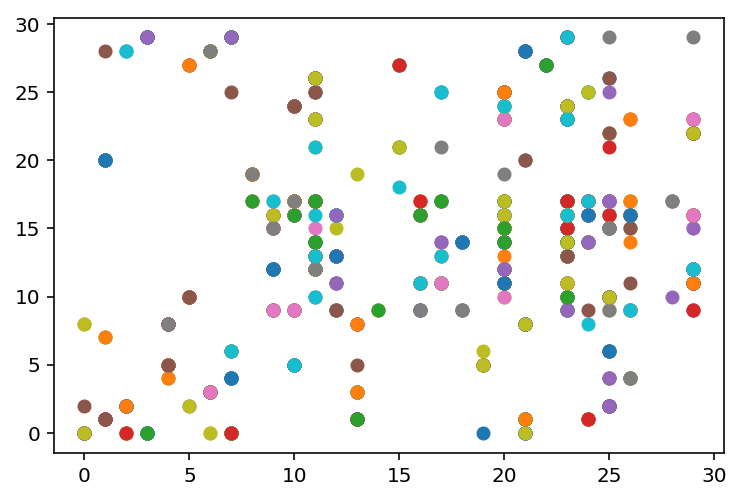

In [25]:
print(som.df.shape[0])


for row in (som.df.iterrows()):
    currentDp = np.array(row[1])
    bmu = som.findBestMatchingUnit(currentDp)
    plt.plot(bmu[0], bmu[1], marker='o')
plt.show()

## 2. Klassifikation

### a) Erarbeiten Sie sich ein einfaches Klassifikationsverfahren, mit der die SOM die Daten klassifizieren könnte. Tipp: Mehrheitsentscheidung.

### b) Implementieren Sie eine Funktion, mit der die SOM klassifizieren kann.

### c) BONUS: Erweitern Sie die SOM-Klassifikation für eine bestmögliche Klassifikation.

### d) Trainieren Sie beide Klassifikatoren auf dem Trainingsdatensatz und predizieren Sie auf den Testdatensatz.

## 3. Evaluierung und Visualisierung der Ergebnisse

### a) Evaluieren Sie die Vorhersagen (Prediktionen) aus Aufgabe 2 anhand der Qualitäts-maße, die Sie im ersten Übungsblatt erarbeitet und implementiert haben. Interpretieren Sie die Ergebnisse.

### b) Visualisieren Sie die Klassifikationsergebnisse in geeigneter Form.

### c) BONUS: Werten Sie den Einfluss der Vorprozessierungen aus Übungsblatt 1 aus.